<a href="https://colab.research.google.com/github/DivyanshiChawla/Pictogen-AI/blob/main/Outpainting%20a%20starry%20night.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y diffusers transformers jax jaxlib
!pip cache purge

Found existing installation: transformers 4.42.4
Uninstalling transformers-4.42.4:
  Successfully uninstalled transformers-4.42.4
Found existing installation: jax 0.4.26
Uninstalling jax-0.4.26:
  Successfully uninstalled jax-0.4.26
Found existing installation: jaxlib 0.4.26+cuda12.cudnn89
Uninstalling jaxlib-0.4.26+cuda12.cudnn89:
  Successfully uninstalled jaxlib-0.4.26+cuda12.cudnn89
Files removed: 168


In [2]:
!pip install --no-cache-dir diffusers==0.18.2 transformers==4.30.2 torch==2.0.1 torchvision==0.15.2 accelerate==0.20.3
!pip install --no-cache-dir matplotlib gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 279.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 209.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 316.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 329.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 208.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 181.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 239.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 213.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import torch
from diffusers import StableDiffusionInpaintPipeline
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import gdown

Downloading...
From: https://drive.google.com/uc?id=17FCAXI5mS2Iof9NWQAmg68H2rGK0xTIc
To: /content/assignment.jpg
100%|██████████| 589k/589k [00:00<00:00, 63.0MB/s]


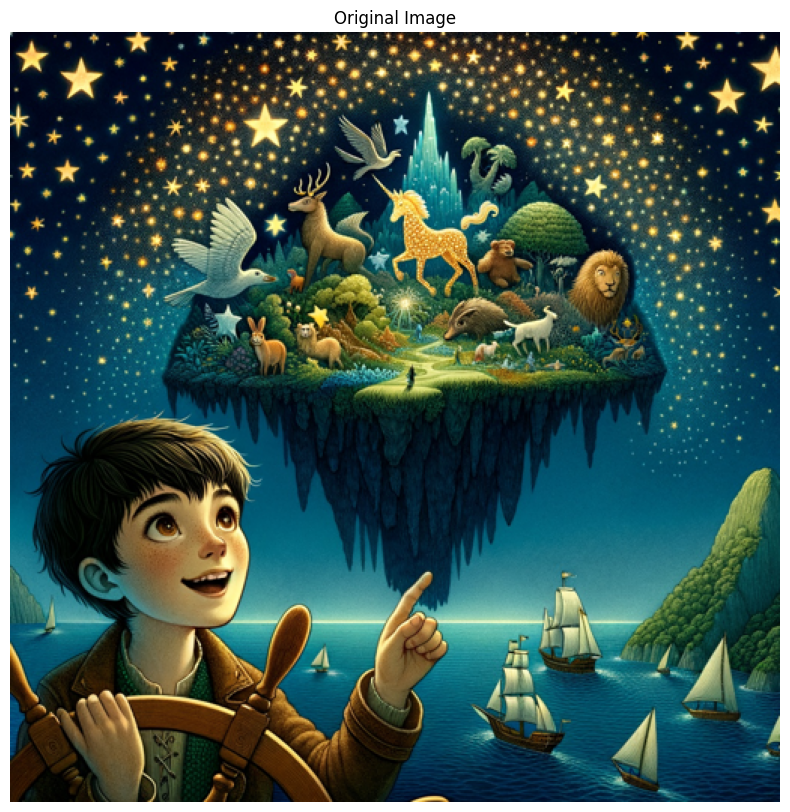

In [5]:
# downloading the image from Drive
file_id = '17FCAXI5mS2Iof9NWQAmg68H2rGK0xTIc'
gdown.download(f"https://drive.google.com/uc?id={file_id}", 'assignment.jpg', quiet=False)

# loading and displaying the original image
original_image = Image.open('assignment.jpg').convert("RGB")
original_image = original_image.resize((512, 512))  # Resize to 512x512 for memory considerations

plt.figure(figsize=(10, 10))
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [6]:
# creating extended image with border
border_size = 64
extended_size = (512 + 2 * border_size, 512 + 2 * border_size)
extended_image = Image.new('RGB', extended_size, (0, 0, 0))  # Black background
extended_image.paste(original_image, (border_size, border_size))

In [7]:
# create mask for outpainting
mask = Image.new('L', extended_size, 0)
draw = ImageDraw.Draw(mask)
draw.rectangle([0, 0, extended_size[0], border_size], fill=255)  # Top
draw.rectangle([0, 0, border_size, extended_size[1]], fill=255)  # Left
draw.rectangle([0, extended_size[1]-border_size, extended_size[0], extended_size[1]], fill=255)  # Bottom
draw.rectangle([extended_size[0]-border_size, 0, extended_size[0], extended_size[1]], fill=255)  # Right

In [8]:
# loading the inpainting pipeline
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.']


  0%|          | 0/50 [00:00<?, ?it/s]

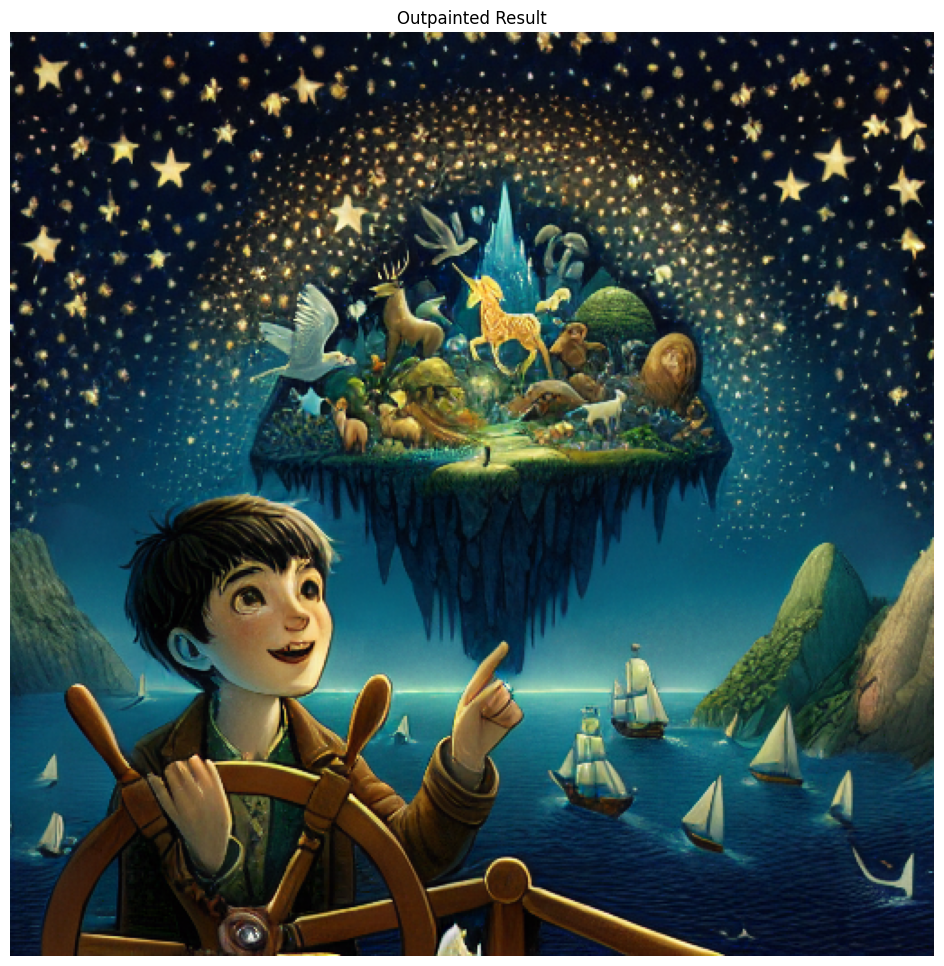

In [20]:
prompt = ("Give the image a natural extension."
          "A fantastical night scene with a starry sky."
          "On the left and right, continue the ocean with more sailing ships."
          "At the top, expand the night sky with more stars and perhaps some nebulae."
          "At the bottom, show complete ship with ocean waves and perhaps a distant coastline. Maintain the magical and dreamy atmosphere of the original image.")

negative_prompt = "blurry, distorted, unrealistic, poor quality, bad composition. "

# Perform outpainting
with torch.no_grad():
    result = pipe(
        prompt=prompt,
        image=extended_image,
        mask_image=mask,
        num_inference_steps=50,
        guidance_scale=7.5,
    ).images[0]

# Display the outpainted image
plt.figure(figsize=(12, 12))
plt.imshow(result)
plt.title("Outpainted Result")
plt.axis("off")
plt.show()

In [21]:
# saving the outpainted image
output_path = "outpainted_image.png"
result.save(output_path)
print(f"Outpainted image saved to {output_path}")

Outpainted image saved to outpainted_image.png
